In [1]:
#maite's branch file

In [2]:
#Importing dependencies and setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import linregress
import scipy.stats as st
from matplotlib.pylab import rcParams
import seaborn as sns

#import spotify keys
from config import client_id
from config import client_secret

In [3]:
#from: https://stmorse.github.io/journal/spotify-api.html

AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [4]:
#from: https://stmorse.github.io/journal/spotify-api.html

#base URL for Spotify API
base_url = 'https://api.spotify.com/v1/'

#In order to access, we send a properly formed GET request to the API server, with our access_token in the header. Let’s save this header info now, in the following very specific format:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [5]:
#import global top songs csv
global_songs_df = pd.read_csv("resources/global-weekly-2022-06-02.csv")

#extracting track id (removing "spotify:track:")
track_id_series = global_songs_df.uri.str[14:]

#convert to df and rename column
track_id_df = track_id_series.to_frame().rename(columns={"uri":"track_id"})

#merge dfs
cleaned_global_df = global_songs_df.merge(track_id_df, how="inner", left_index=True, right_index=True)

#pare down columns
cleaned_global_df = cleaned_global_df[["rank", "track_id", "artist_names", "track_name", "peak_rank", "previous_rank", "weeks_on_chart", "streams"]]
cleaned_global_df

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704
...,...,...,...,...,...,...,...,...
195,196,1WCEAGGRD066z2Q89ObXTq,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,178,195,4,5568564
196,197,2N8m6CYs74qQO4mjVcXO30,Tones And I,Dance Monkey,1,-1,148,5556591
197,198,5JCoSi02qi3jJeHdZXMmR8,Olivia Rodrigo,favorite crime,11,197,48,5552673
198,199,6lX6l7OuA3qrnIRfdsr0dw,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,48,168,28,5552315


In [6]:
#empty lists to store song data
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
id_num = []
track_href = []
analysis_url = []
duration_mins = []
time_signature = []

In [7]:
for t in cleaned_global_df["track_id"]:
    response = requests.get(base_url + 'audio-features/' + t, headers=headers).json()
    
    #fill in track info for each audio feature / empty list
    danceability.append(response["danceability"])
    energy.append(response["energy"])
    key.append(response["key"])
    loudness.append(response["loudness"])
    mode.append(response["mode"])
    speechiness.append(response["speechiness"])
    acousticness.append(response["acousticness"])
    instrumentalness.append(response["instrumentalness"])
    liveness.append(response["liveness"])
    valence.append(response["valence"])
    tempo.append(response["tempo"])
    id_num.append(response["id"])
    track_href.append(response["track_href"])
    analysis_url.append(response["analysis_url"])    
    #duration recorded in api in milliseconds, converting to minutes here
    duration_mins.append(round((response["duration_ms"] / 60000),2))
    time_signature.append(response["time_signature"])
    

In [8]:
songs_dict = {
    "track_id": id_num,
    "danceability": danceability,
    "energy": energy,
    "key": key,
    "loudness": loudness,
    "mode": mode,
    "speechiness": speechiness,
    "acousticness": acousticness,
    "instrumentalness": instrumentalness,
    "liveness": liveness,
    "valence": valence,
    "tempo": tempo,
    "duration_mins": duration_mins,
    "time_signature": time_signature,
    "track_href": track_href,
    "analysis_url": analysis_url
    
}

song_info_df = pd.DataFrame(songs_dict)
song_info_df.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,4Dvkj6JhhA12EX05fT7y2e,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,6Sq7ltF9Qa7SNFBsV5Cogx,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3k3NWokhRRkEPhCzPmV8TW,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,75FEaRjZTKLhTrFGsfMUXR,0.629,0.547,10,-13.123,0,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,1IHWl5LamUGEuP4ozKQSXZ,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [9]:
full_track_data = cleaned_global_df.merge(song_info_df, how='inner', on="track_id")

In [10]:
full_track_data.head()

,rank,track_id,artist_names,track_name,peak_rank,previous_rank,weeks_on_chart,streams,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature,track_href,analysis_url
0,1,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,1,1,9,60420855,0.520,0.731,...,0.0557,0.3420,0.001010,0.3110,0.662,173.930,2.79,4,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...
1,2,6Sq7ltF9Qa7SNFBsV5Cogx,"Bad Bunny, Chencho Corleone",Me Porto Bonito,2,4,4,39026161,0.911,0.712,...,0.0817,0.0901,0.000027,0.0933,0.425,92.005,2.98,4,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...
2,3,3k3NWokhRRkEPhCzPmV8TW,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,3,3,4,37623538,0.647,0.686,...,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4.30,4,https://api.spotify.com/v1/tracks/3k3NWokhRRkE...,https://api.spotify.com/v1/audio-analysis/3k3N...
3,4,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,4,-1,1,32763806,0.629,0.547,...,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4.98,4,https://api.spotify.com/v1/tracks/75FEaRjZTKLh...,https://api.spotify.com/v1/audio-analysis/75FE...
4,5,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Tití Me Preguntó,5,9,4,31126704,0.650,0.715,...,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4.06,4,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...


In [11]:
top_song_info_df = full_track_data[["rank", "artist_names", "track_name", "weeks_on_chart", "streams", 
                                    "danceability", "energy", "liveness"]]

top_song_info_df

,rank,artist_names,track_name,weeks_on_chart,streams,danceability,energy,liveness
0,1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604
4,5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260
...,...,...,...,...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580
196,197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490
197,198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,28,5552315,0.787,0.700,0.6630


In [12]:
new_songs_df = top_song_info_df.set_index('rank')
new_songs_df

,artist_names,track_name,weeks_on_chart,streams,danceability,energy,liveness
rank,,,,,,,
1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110
2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933
3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280
4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604
5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260
...,...,...,...,...,...,...,...
196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580
197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490
198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470


In [13]:
new_songs_df = top_song_info_df.rename(columns={"artist_names":"Artist Names", "track_name":"Track Name", 
                                                "weeks_on_chart":"Weeks on Chart"})

In [14]:
#Scatterplot for songs and danceability
danceability_df = new_songs_df[["Artist Names", "Track Name", "danceability"]]
#danceability_df

In [15]:
dance_df = danceability_df.reset_index(drop=True)

In [16]:
#dance_df

The correlation between danceability and streams is 0.1


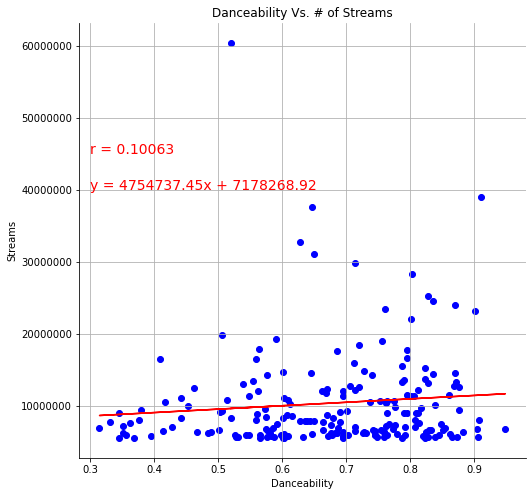

In [61]:
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Looking at the relationship between tempo and danceability of global top songs 

#make the columns in question numeric 
new_songs_df['danceability'] = pd.to_numeric(new_songs_df['danceability'])
new_songs_df['streams'] = pd.to_numeric(new_songs_df['streams'])

#create a scatter plot to see correlation between variables 
new_songs_df.plot(kind="scatter", x="danceability", y="streams", c = ['blue'], grid=True, figsize=(8,8),
              title="Danceability Vs. # of Streams")

#find correlation between the variables and print
danceability = new_songs_df.iloc[:,5]
streams = new_songs_df.iloc[:,4]
correlation = st.pearsonr(danceability,streams)
print(f"The correlation between danceability and streams is {round(correlation[0],2)}")

plt.xlabel('Danceability')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain')

xvalues = new_songs_df["danceability"]
yvalues = new_songs_df["streams"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.3,40000000),fontsize=14,color="red")
plt.annotate(f"r = {round(rvalue,5)}",(0.3,45000000),fontsize=14,color="red")

#save the graph to the images folder 
plt.savefig('images/Danceability_vs_Streams', dpi = 300)


#display the graph with the correlation number 

plt.show()

The correlation between energy and streams is 0.01


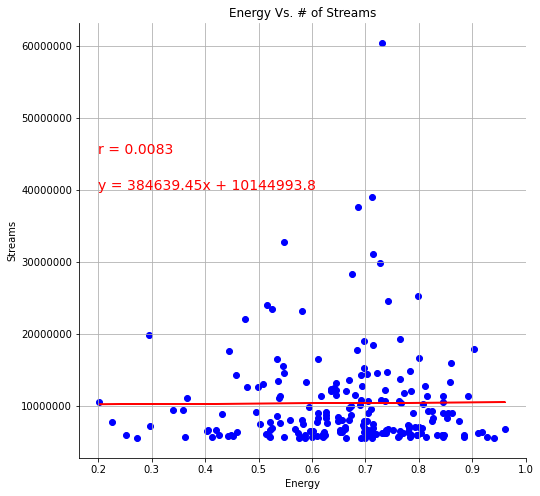

In [71]:
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Looking at the relationship between tempo and danceability of global top songs 

#make the columns in question numeric 
new_songs_df['energy'] = pd.to_numeric(new_songs_df['energy'])
new_songs_df['streams'] = pd.to_numeric(new_songs_df['streams'])

#create a scatter plot to see correlation between variables 
new_songs_df.plot(kind="scatter", x="energy", y="streams", c = ['blue'], grid=True, figsize=(8,8),
              title="Energy Vs. # of Streams")

#find correlation between the variables and print
energy = new_songs_df.iloc[:,6]
streams = new_songs_df.iloc[:,4]
correlation = st.pearsonr(energy,streams)
print(f"The correlation between energy and streams is {round(correlation[0],2)}")

plt.xlabel('Energy')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain')


xvalues = new_songs_df["energy"]
yvalues = new_songs_df["streams"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.2,40000000),fontsize=14,color="red")
plt.annotate(f"r = {round(rvalue,5)}",(0.2,45000000),fontsize=14,color="red")

#save the graph to the images folder 
plt.savefig('images/Energy_vs_Streams', dpi = 300)


#display the graph with the correlation number 

plt.show()

The correlation between liveness and streams is 0.0865


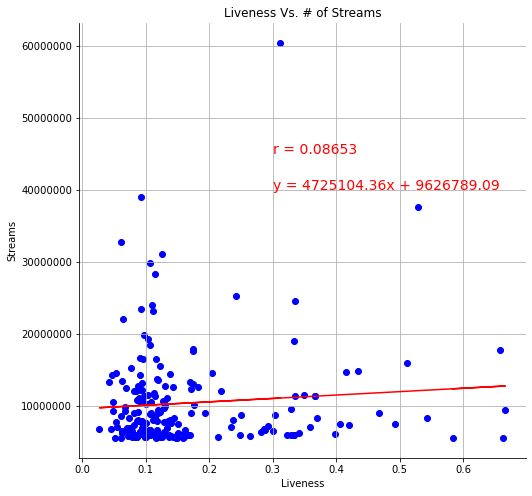

In [67]:
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Looking at the relationship between tempo and danceability of global top songs 

#make the columns in question numeric 
new_songs_df['liveness'] = pd.to_numeric(new_songs_df['liveness'])
new_songs_df['streams'] = pd.to_numeric(new_songs_df['streams'])

#create a scatter plot to see correlation between variables 
new_songs_df.plot(kind="scatter", x="liveness", y="streams", c = ['blue'], grid=True, figsize=(8,8),
              title="Liveness Vs. # of Streams")

#find correlation between the variables and print
liveness = new_songs_df.iloc[:,7]
streams = new_songs_df.iloc[:,4]
correlation = st.pearsonr(liveness,streams)
print(f"The correlation between liveness and streams is {round(correlation[0],4)}")

plt.xlabel('Liveness')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain')


xvalues = new_songs_df["liveness"]
yvalues = new_songs_df["streams"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.3,40000000),fontsize=14,color="red")
plt.annotate(f"r = {round(rvalue,5)}",(0.3,45000000),fontsize=14,color="red")

#save the graph to the images folder 
plt.savefig('images/Liveness_vs_Streams', dpi = 300)


#display the graph with the correlation number 

plt.show()

In [32]:
new_songs_df

,rank,Artist Names,Track Name,Weeks on Chart,streams,danceability,energy,liveness
0,1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604
4,5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260
...,...,...,...,...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580
196,197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490
197,198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,28,5552315,0.787,0.700,0.6630


In [33]:
songs_corr_df = new_songs_df.corr()
songs_corr_df

,rank,Weeks on Chart,streams,danceability,energy,liveness
rank,1.000000,0.297743,-0.748321,-0.123161,0.000271,-0.034471
Weeks on Chart,0.297743,1.000000,-0.254571,-0.159204,-0.068475,-0.059519
streams,-0.748321,-0.254571,1.000000,0.100629,0.008298,0.086533
danceability,-0.123161,-0.159204,0.100629,1.000000,0.186564,0.024157
energy,0.000271,-0.068475,0.008298,0.186564,1.000000,0.048307
liveness,-0.034471,-0.059519,0.086533,0.024157,0.048307,1.000000


The correlation between danceability and energy is 0.19


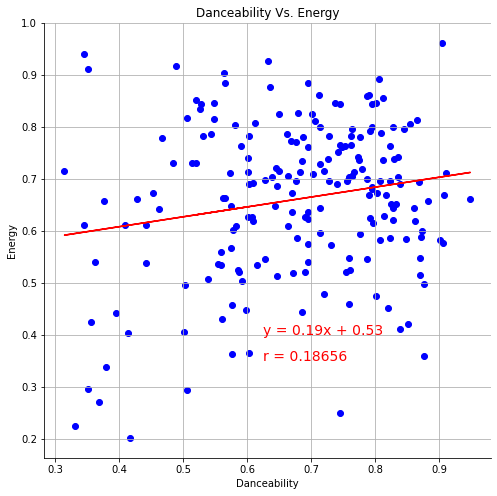

In [70]:
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#Looking at the relationship between tempo and danceability of global top songs 

#make the columns in question numeric 
new_songs_df['danceability'] = pd.to_numeric(new_songs_df['danceability'])
new_songs_df['energy'] = pd.to_numeric(new_songs_df['energy'])

#create a scatter plot to see correlation between variables 
new_songs_df.plot(kind="scatter", x="danceability", y="energy", c = ['blue'], grid=True, figsize=(8,8),
              title="Danceability Vs. Energy")

#find correlation between the variables and print
danceability = new_songs_df.iloc[:,5]
energy = new_songs_df.iloc[:,6]
correlation = st.pearsonr(danceability,energy)
print(f"The correlation between danceability and energy is {round(correlation[0],2)}")

plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.ticklabel_format(style='plain')

xvalues = new_songs_df["danceability"]
yvalues = new_songs_df["energy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
plt.scatter(xvalues, yvalues, c="b")
plt.plot(xvalues,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0.625,0.4),fontsize=14,color="red")
plt.annotate(f"r = {round(rvalue,5)}",(0.625,0.35),fontsize=14,color="red")

#save the graph to the images folder 
plt.savefig('images/Danceability_vs_Energy', dpi = 300)


plt.show()

In [36]:
new_songs_df.iloc[:,5]

0      0.520
1      0.911
2      0.647
3      0.629
4      0.650
       ...  
195    0.601
196    0.824
197    0.369
198    0.787
199    0.603
Name: danceability, Length: 200, dtype: float64

In [37]:
new_songs_df.describe()

,rank,Weeks on Chart,streams,danceability,energy,liveness
count,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000
mean,100.500000,37.640000,1.039922e+07,0.677420,0.660955,0.163475
std,57.879185,50.044206,6.864669e+06,0.145284,0.148103,0.125716
min,1.000000,1.000000,5.548718e+06,0.315000,0.202000,0.027200
25%,50.750000,4.000000,6.284778e+06,0.578500,0.576500,0.090875
50%,100.500000,18.000000,7.982727e+06,0.695000,0.685000,0.115000
75%,150.250000,52.000000,1.205175e+07,0.795000,0.767250,0.172500
max,200.000000,279.000000,6.042086e+07,0.949000,0.962000,0.666000


In [38]:
#try binning song duration before making a bar chart
#min song length was 2.00 min, max was 5.91
bins = [0, 50, 100, 150, 200]
rank_labels = ["1 to 50", "51 to 100", "101 to 150", "151 to 200"]

new_songs_df["rank_bins"] = pd.cut(new_songs_df["rank"], bins, labels=rank_labels)
new_songs_df

,rank,Artist Names,Track Name,Weeks on Chart,streams,danceability,energy,liveness,rank_bins
0,1,Harry Styles,As It Was,9,60420855,0.520,0.731,0.3110,1 to 50
1,2,"Bad Bunny, Chencho Corleone",Me Porto Bonito,4,39026161,0.911,0.712,0.0933,1 to 50
2,3,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,4,37623538,0.647,0.686,0.5280,1 to 50
3,4,Kate Bush,Running Up That Hill (A Deal With God) - 2018 ...,1,32763806,0.629,0.547,0.0604,1 to 50
4,5,Bad Bunny,Tití Me Preguntó,4,31126704,0.650,0.715,0.1260,1 to 50
...,...,...,...,...,...,...,...,...,...
195,196,"David Guetta, Becky Hill, Ella Henderson",Crazy What Love Can Do,4,5568564,0.601,0.713,0.1580,151 to 200
196,197,Tones And I,Dance Monkey,148,5556591,0.824,0.587,0.1490,151 to 200
197,198,Olivia Rodrigo,favorite crime,48,5552673,0.369,0.272,0.1470,151 to 200
198,199,"Blessd, Justin Quiles, Lenny Tavárez",Medallo,28,5552315,0.787,0.700,0.6630,151 to 200


In [41]:
avg_rank_df = new_songs_df.groupby('rank_bins')[['streams','danceability','energy','liveness']].mean()
avg_rank_df.reset_index(inplace=True)
avg_rank_df

,rank_bins,streams,danceability,energy,liveness
0,1 to 50,18956212.42,0.71730,0.65278,0.165058
1,51 to 100,9798418.64,0.65972,0.67020,0.175716
2,101 to 150,6986239.46,0.67762,0.65394,0.148804
3,151 to 200,5856022.14,0.65504,0.66690,0.164320


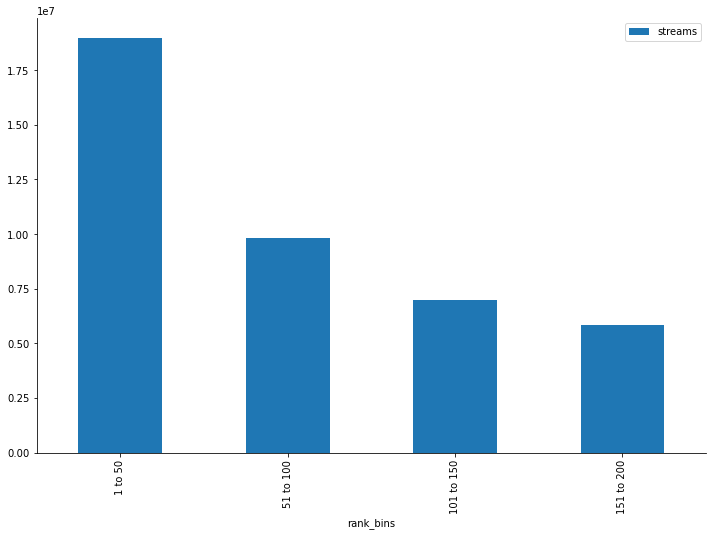

In [42]:
bins_fig = avg_rank_df.plot(x='rank_bins', y='streams', kind="bar")


#save as png
#plt.savefig("images/duration_bar.png")
plt.show()

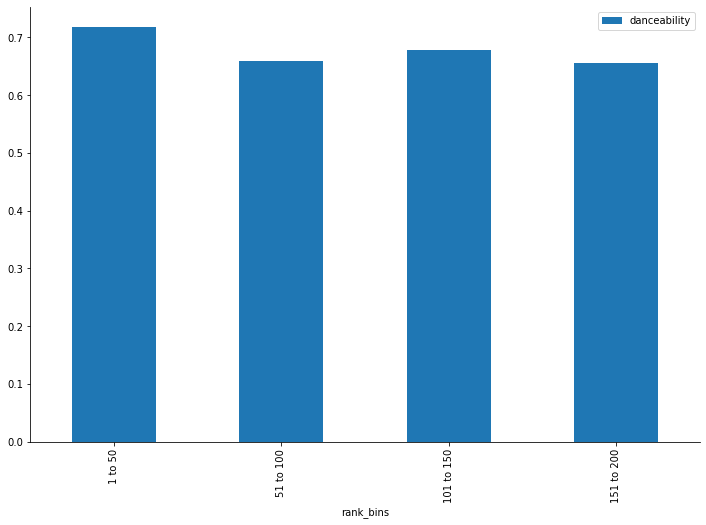

In [56]:
dance_fig = avg_rank_df.plot(x='rank_bins', y='danceability', kind="bar")


#save as png
#plt.savefig("images/duration_bar.png")
plt.show()

In [ ]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

#dropping top header if multiples
duration_streams.columns = duration_streams.columns.droplevel(0)
